<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#복습" data-toc-modified-id="복습-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>복습</a></span><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#성능평가" data-toc-modified-id="성능평가-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>성능평가</a></span></li></ul></li><li><span><a href="#seaborn" data-toc-modified-id="seaborn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>seaborn</a></span></li><li><span><a href="#Hold-Out" data-toc-modified-id="Hold-Out-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hold Out</a></span><ul class="toc-item"><li><span><a href="#StratifiedKFold-(층화계층법)" data-toc-modified-id="StratifiedKFold-(층화계층법)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>StratifiedKFold (층화계층법)</a></span></li><li><span><a href="#Group-KFold" data-toc-modified-id="Group-KFold-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Group KFold</a></span></li><li><span><a href="#ShuffleSplit" data-toc-modified-id="ShuffleSplit-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>ShuffleSplit</a></span></li><li><span><a href="#cross_val_predict" data-toc-modified-id="cross_val_predict-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>cross_val_predict</a></span></li><li><span><a href="#corss_validate" data-toc-modified-id="corss_validate-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>corss_validate</a></span><ul class="toc-item"><li><span><a href="#score-time" data-toc-modified-id="score-time-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>score time</a></span></li></ul></li></ul></li><li><span><a href="#learning-curve" data-toc-modified-id="learning-curve-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>learning curve</a></span></li></ul></div>

# [AI 오픈 이노베이션] 기본 저녁반<a class="tocSkip">
GitHub link: <a href="https://github.com/realblack0/ai_lecture_fundamental">here</a>  
E-Mail: realblack0@gmail.com

## 복습

### 데이터 불러오기
이제 데이터 불러오는 것은 안 보고도 할 수 있어야 한다.

In [1]:
from sklearn.datasets import load_diabetes

In [4]:
import pandas as pd

In [2]:
data = load_diabetes()

In [5]:
data_pd = pd.DataFrame(data.data, columns=data.feature_names)

In [6]:
data_ta = pd.DataFrame(data.target, columns=["target"])

In [7]:
diabetes = pd.concat([data_pd, data_ta], axis=1)

In [18]:
print(data.DESCR) # 보안에 관련된 문제일때 column명을 안주는 경우도 있다. (S1, S2, S3, S4, S5, S6)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

### EDA

In [22]:
import seaborn as sns

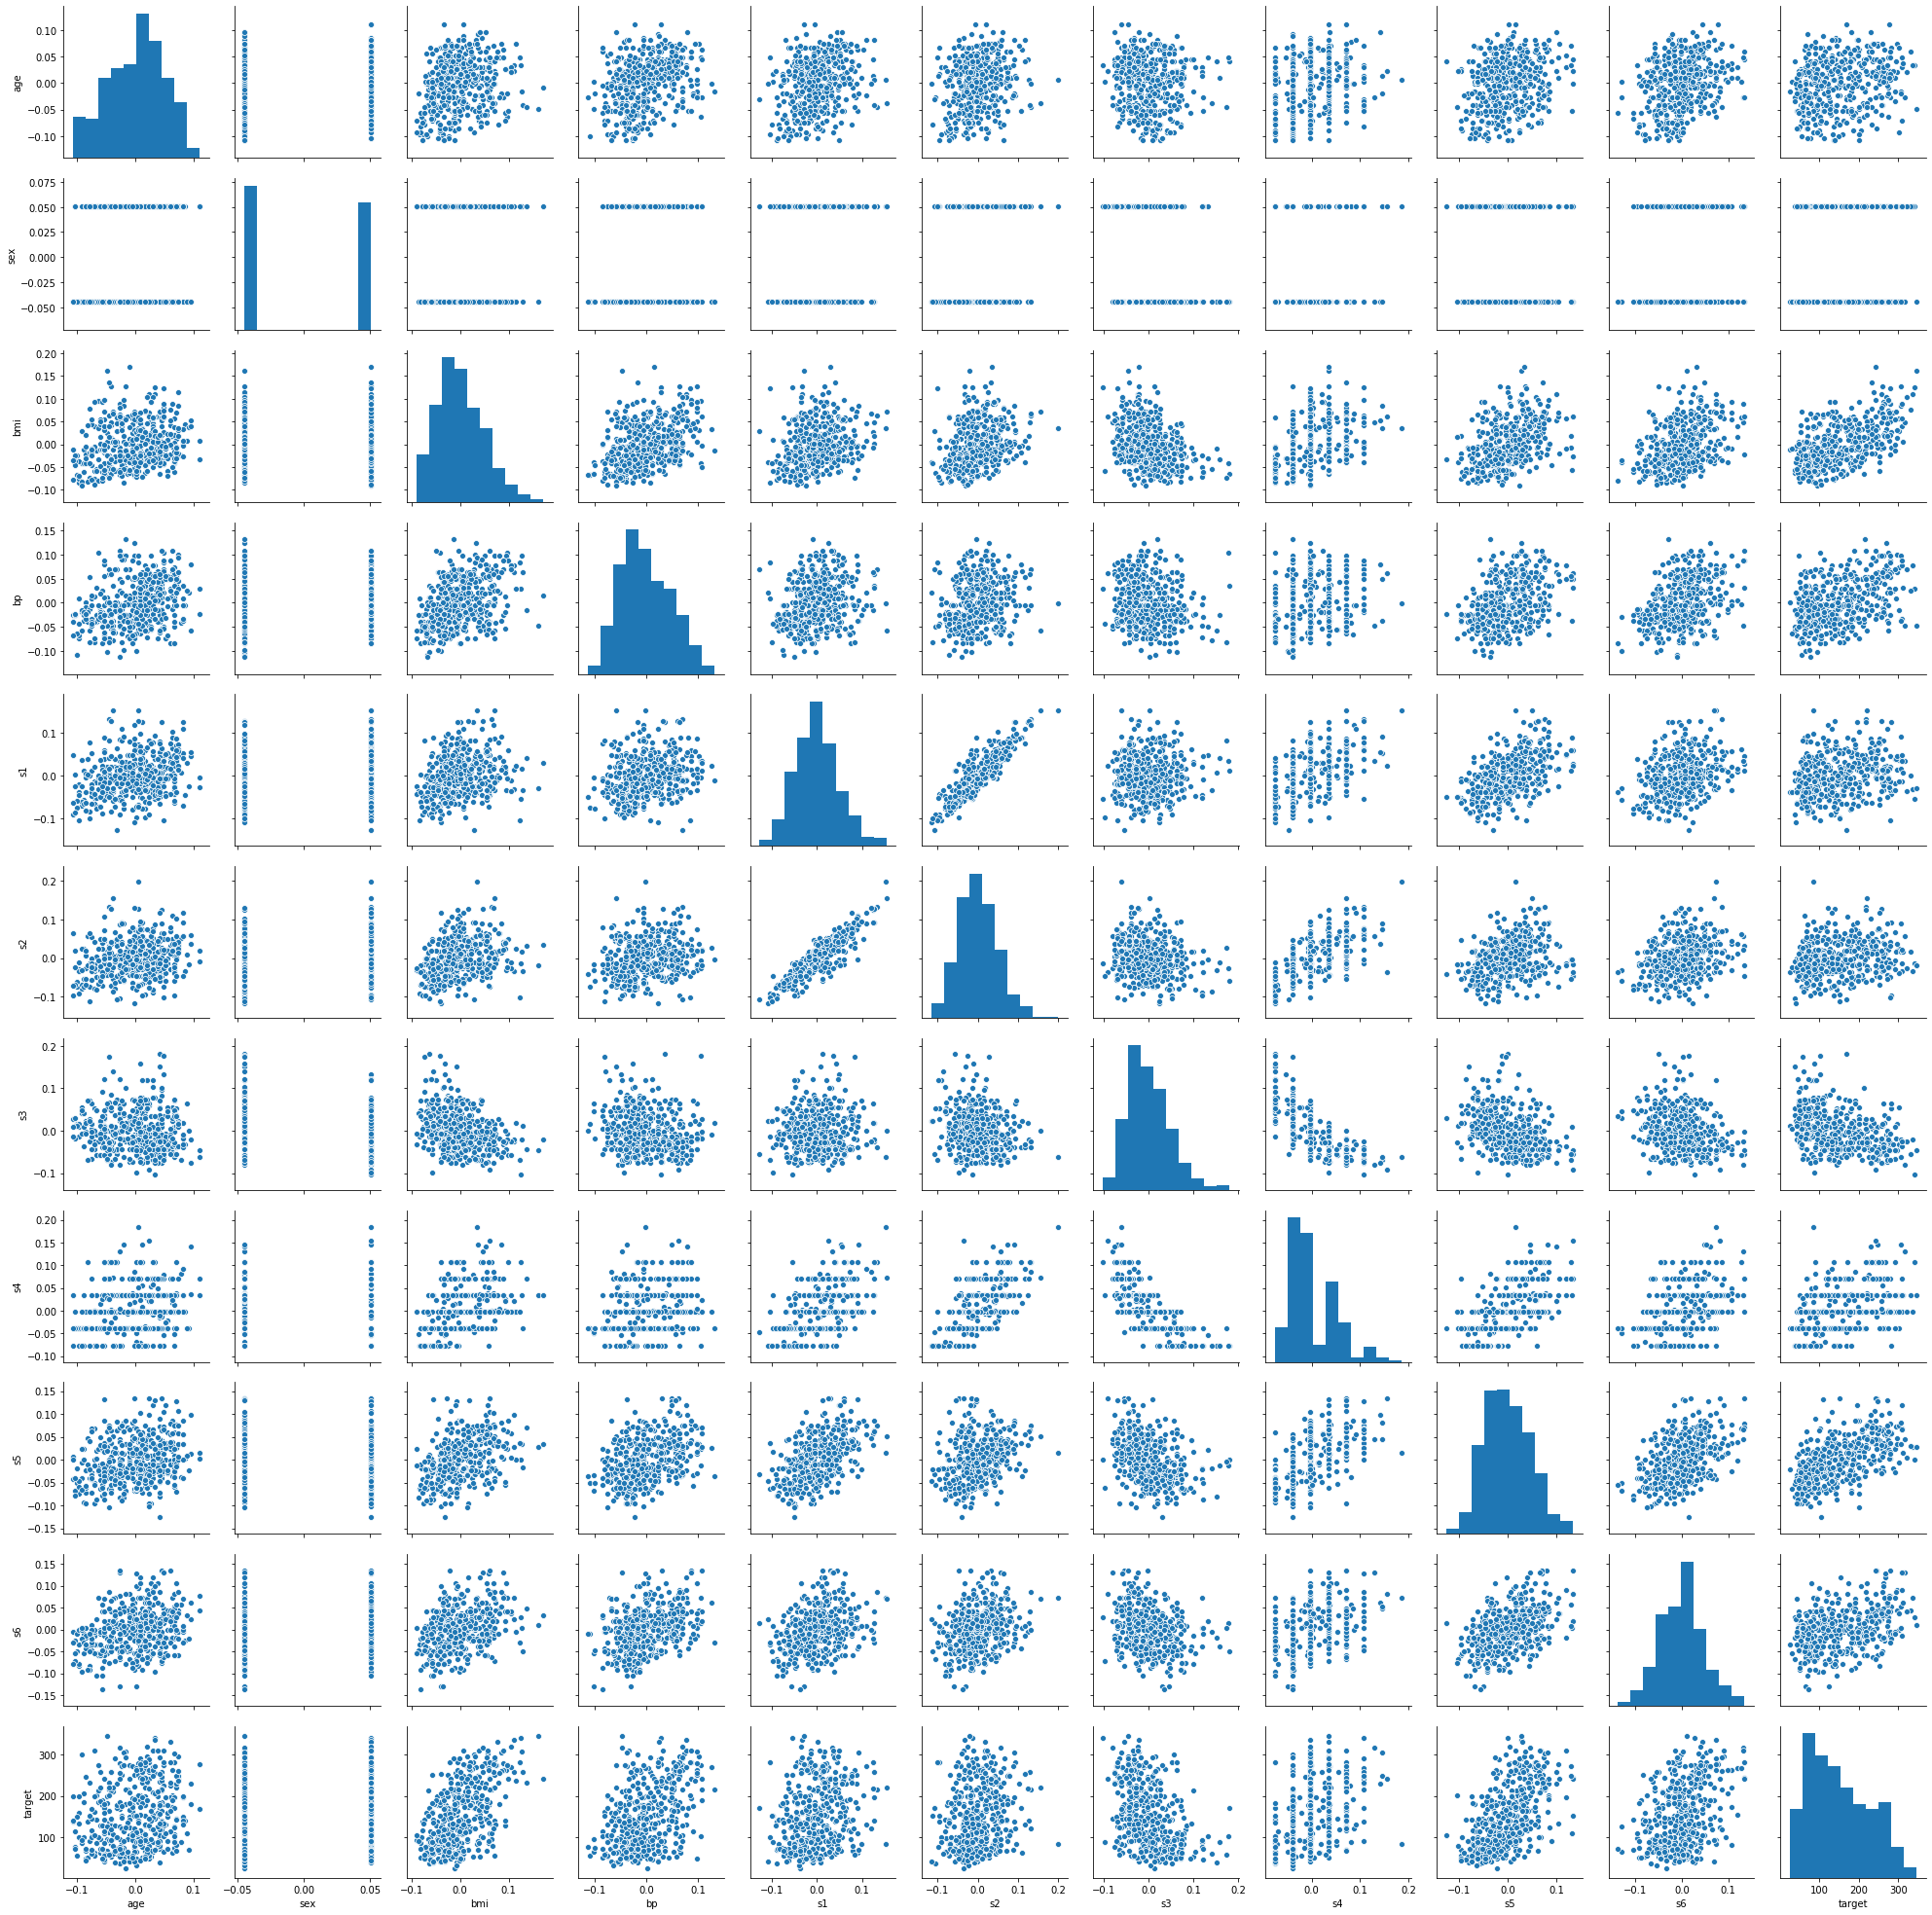

In [23]:
sns.pairplot(diabetes)

In [24]:
diabetes.skew() # 왜도; 분포의 비대칭성

age      -0.231382
sex       0.127385
bmi       0.598148
bp        0.290664
s1        0.378108
s2        0.436592
s3        0.799255
s4        0.735374
s5        0.291774
s6        0.207917
target    0.440563
dtype: float64

In [25]:
diabetes.kurt() # 첨도; 뽀족한 정도

age      -0.671224
sex      -1.992811
bmi       0.095094
bp       -0.532780
s1        0.232948
s2        0.601381
s3        0.981507
s4        0.444402
s5       -0.134366
s6        0.236917
target   -0.883057
dtype: float64

In [26]:
diabetes.kurtosis() # 첨도 (kurt와 똑같음)

age      -0.671224
sex      -1.992811
bmi       0.095094
bp       -0.532780
s1        0.232948
s2        0.601381
s3        0.981507
s4        0.444402
s5       -0.134366
s6        0.236917
target   -0.883057
dtype: float64

In [27]:
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


`describe`는 가시성이 떨어져 해석이 쉽지 않으므로 `boxplot`도 한다.

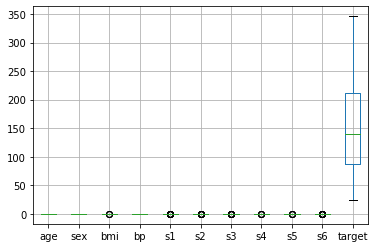

In [29]:
diabetes.boxplot()

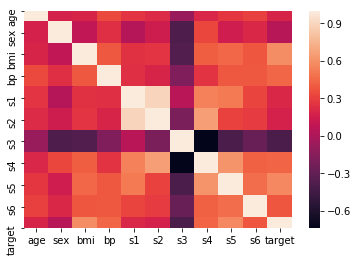

In [28]:
sns.heatmap(diabetes.corr())

seaborn에도 `boxplot`이 있다.  
DataFrame에서 boxplot할 때와 달리x, y를 지정해줘야 한다. 

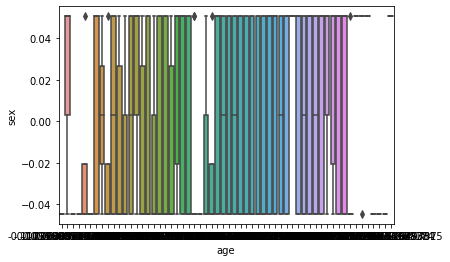

In [31]:
sns.boxplot("age", "sex", data=diabetes) 

seaborn은 matplotlib을 기반으로 만들어졌기 떄문에 `figure`를 수정하면 seaborn의 그래프에도 영향을 미친다.

In [34]:
import matplotlib.pyplot as plt

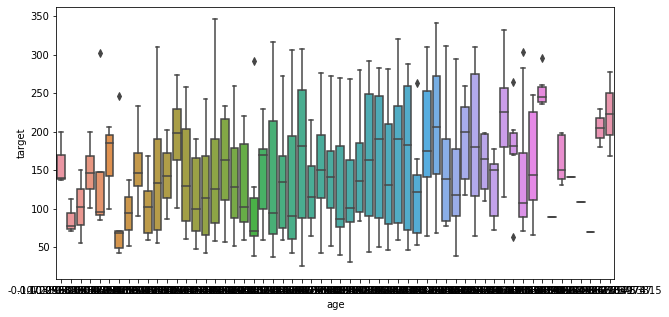

In [35]:
plt.figure(figsize=(10, 5)) # 그래프 사이즈 크게
sns.boxplot("age", "target", data=diabetes) 

### 성능평가

데이터의 양이 적절한지 `cross_val_score`로 확인해본다.  
또한 이 데이터에 대한 알고리즘의 성능을 대강 파악할 수 있다.

In [13]:
from sklearn.model_selection import cross_val_score

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
m = cross_val_score(KNeighborsRegressor(), diabetes[diabetes.columns[:-1]], diabetes[["target"]], cv=10, n_jobs=-1)

예측의 편차가 크면 데이터가 부족하다고 판단한다.

In [54]:
m

array([0.35877598, 0.19725206, 0.1586553 , 0.52648434, 0.2230898 ,
       0.51075541, 0.29724064, 0.30049838, 0.28216105, 0.47398761])

In [55]:
m.mean()

0.33289005677540284

hold out 기법으로 train set과 test set으로 나누고 모델을 만든다.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(diabetes[diabetes.columns[:-1]], diabetes[["target"]])

In [50]:
knn = KNeighborsRegressor()

In [51]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [52]:
knn.score(X_test, y_test)

0.3776346882425262

## seaborn

In [36]:
import seaborn as sns

In [37]:
tips = sns.load_dataset("tips")

tips 데이터에서 요일별 흡연자/비흡연자의 총 지출을 비교하려면 `groupby`로 표를 만들 수 있다.

In [39]:
tips.groupby(["day", "smoker"]).agg(["max", "min"])["total_bill"].T

day      Thur           Fri           Sat           Sun       
smoker    Yes     No    Yes     No    Yes     No    Yes     No
max     43.11  41.19  40.17  22.75  50.81  48.33  45.35  48.17
min     10.34   7.51   5.75  12.46   3.07   7.25   7.25   8.77

seaborn을 이용하면 `groupby`를 하지 않아도 알아서 집계하고 그래프를 그려준다.

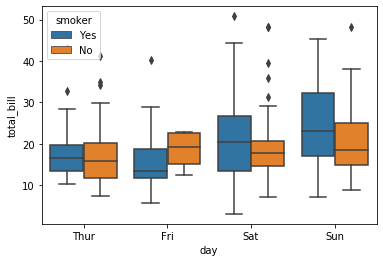

In [41]:
sns.boxplot("day", "total_bill", hue="smoker", data=tips) # 위의 표와 같음

`violinplot`은 `boxplot`과 비슷한데 outlier가 안보인다.

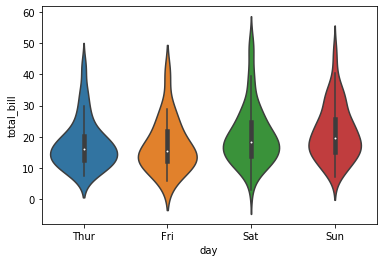

In [42]:
sns.violinplot("day", "total_bill", data=tips)

`boxenplot`은 violinplot이랑 boxplot의 혼종...

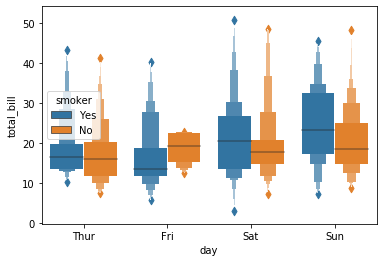

In [43]:
sns.boxenplot("day", "total_bill", hue="smoker", data=tips)

## Hold Out

### StratifiedKFold (층화계층법)

- 클래스 별로 KFold한다.  
- 데이터가 크면 굳이 stratified 할 필요가 없다. 
    - 큰 수의 법칙에 의해서 stratified 하지 않아도 클래스가 골고루 분배된다.
    - startified는 오히려 sampling의 random한 정도를 떨어뜨려서 KFold의 의미가 퇴색된다.
- 데이터가 작으면 stratified한다.  

**큰 수의 법칙**  
큰 모집단에서 무작위로 뽑은 표본의 평균이 전체 모집단의 평균과 가까울 가능성이 높다.

In [57]:
from sklearn.model_selection import KFold, StratifiedKFold

In [58]:
import mglearn

데이터가 클래스의 순서대로 정렬되어 있을때, shuffle하지 않고 KFold하면 그림의 위쪽처럼 된다.  
Fold 1를 test set으로 했을 때는 train set에 class 1이 없기 때문에 학습이 제대로 되지 않는다. (극단적 예시)  
  
Stratified하게 split했더라면, 그림의 아래처럼 각 fold에 class가 골고루 분배되어서 클래스 불균형으로 인해서 학습이 제대로 안되는 문제를 막을 수 있다.

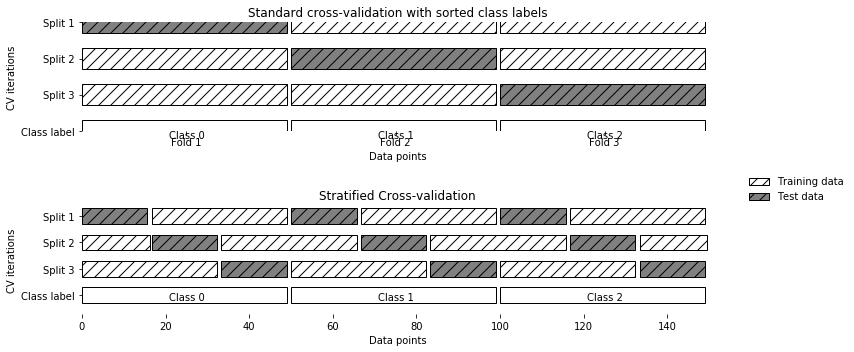

In [59]:
mglearn.plot_cross_validation.plot_stratified_cross_validation()

`KFold`는 인스턴스해서 `cross_val_score`에 넣을 수 있다.  
`KFold`를 인스턴스할 때 n_splits, shuffle, random_state를 지정해서 `cross_val_score`할 때 반영할 수 있다.  
   
※ 정확히는 `cross_val_score`에서 파라미터 cv에 정수를 인자로 주면 함수 내부에서 `KFold` 객체를 만든다.  

In [60]:
kf = KFold(10)

In [61]:
cross_val_score(KNeighborsRegressor(), diabetes[diabetes.columns[:-1]], diabetes[["target"]], cv=kf, n_jobs=-1)

array([0.35877598, 0.19725206, 0.1586553 , 0.52648434, 0.2230898 ,
       0.51075541, 0.29724064, 0.30049838, 0.28216105, 0.47398761])

regression 문제는 target 값이 서로 다 다르기 때문에 stratified를 쓰지 않는다.

In [157]:
skf = StratifiedKFold(10)

In [ ]:
# Error
# 10등분할 수 없는 target이 있기 때문 (개수가 너무 적어서)
cross_val_score(KNeighborsRegressor(), diabetes[diabetes.columns[:-1]], diabetes[["target"]], cv=skf, n_jobs=-1)

classification 문제일 때 stratified가 유용하다.

In [150]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
data = load_iris()
data_pd = pd.DataFrame(data.data, columns=data.feature_names)
data_ta = pd.DataFrame(data.target, columns=["target"])
iris = pd.concat([data_pd, data_ta], axis=1)

In [151]:
cross_val_score(KNeighborsClassifier(), iris[iris.columns[:-1]], iris[["target"]], cv=skf, n_jobs=-1)

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

여기서는 랜덤성이 중요하다.  
stratified 보다 그냥 KFold가 더 랜덤성이 강하다. 그래서 stratified가 기본 옵션이 아니다.  
무엇을 사용할 지는 상황에 따라서 판단한다.

### Group KFold

`GroupKFold`는 지정된 그룹을 기준으로 데이터를 split한다.

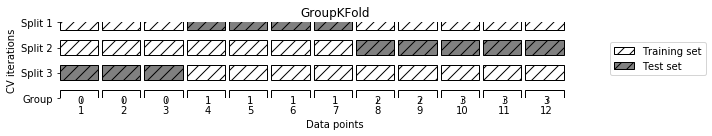

In [64]:
mglearn.plot_cross_validation.plot_group_kfold()

In [129]:
from sklearn.model_selection import GroupKFold

In [139]:
gkf = GroupKFold(4)

In [141]:
cross_val_score(KNeighborsRegressor(), 
                tips[["total_bill", "size"]], 
                tips[["tip"]], 
                cv=gkf,
                groups=tips[["day"]],   # GroupKFold할 때는 groups를 반드시 입력해야함
                n_jobs=-1)

array([0.27997189, 0.07309641, 0.54051109, 0.35428545])

### ShuffleSplit

`ShuffleSplit`은 `KFold`시리즈와 달리 
- 모든 데이터가 한번씩 test set으로 사용되지 않을 수 있다.  
- 같은 데이터가 중복으로 test set으로 사용될 수도 있다.  
- train_size와 test_size 설정에 따라서 사용되지 않는 데이터가 생길 수도 있다.  

KFold보다 랜덤성이 높다.

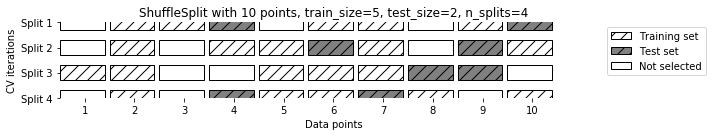

In [119]:
mglearn.plot_cross_validation.plot_shuffle_split()

In [65]:
from sklearn.model_selection import ShuffleSplit

In [66]:
ss = ShuffleSplit() # 내부적으로 composition 방식을 이용함

In [127]:
cross_val_score(KNeighborsRegressor(), diabetes[diabetes.columns[:-1]], diabetes[["target"]], cv=ss, n_jobs=-1)

array([0.467691  , 0.3371833 , 0.34482242, 0.25241406, 0.1463656 ,
       0.32286471, 0.32381441, 0.39596486, 0.31791236, 0.51697144])

### cross_val_predict

쪼개진 각 test set에 대한 score를 구하는 대신에 predict한 값을 반환한다.

In [68]:
from sklearn.model_selection import cross_val_predict

In [72]:
cross_val_predict(KNeighborsRegressor(), diabetes[diabetes.columns[:-1]], diabetes[["target"]], cv=10)

array([[200.2],
       [ 83.2],
       [155.8],
       [180.8],
       [ 86. ],
       [115.4],
       [ 78.2],
       [142. ],
       [126.6],
       [141.4],
       [135.8],
       [150.6],
       [ 92.6],
       [165.4],
       [ 70.2],
       [160.4],
       [180.2],
       [173.4],
       [147.8],
       [ 89.6],
       [100. ],
       [ 73.6],
       [159.6],
       [286.8],
       [191.4],
       [110.2],
       [116.4],
       [118.6],
       [ 96.4],
       [157.2],
       [158.2],
       [ 63.8],
       [269.4],
       [ 80.8],
       [ 88.4],
       [117. ],
       [164.8],
       [128.8],
       [212.4],
       [ 75.4],
       [174.4],
       [132.8],
       [ 93.6],
       [ 75. ],
       [246.8],
       [ 96.4],
       [121.6],
       [152.2],
       [109. ],
       [129.4],
       [121.2],
       [124. ],
       [165.4],
       [ 86.4],
       [134.4],
       [ 78. ],
       [146.2],
       [110.4],
       [111.2],
       [169. ],
       [119.8],
       [119.6],
       [

### corss_validate

score뿐만 아니라 fit_time, score_time도 함께 반환한다.  
옵션 설정에 따라서 리턴 값이 더 많아질 수 있다. (`return_train_score`, `return_estimator`)

In [73]:
from sklearn.model_selection import cross_validate

In [74]:
cross_validate(KNeighborsRegressor(), diabetes[diabetes.columns[:-1]], diabetes[["target"]], cv=10)

{'fit_time': array([0.00300312, 0.00503182, 0.00303268, 0.00400066, 0.00300026,
        0.00299859, 0.00401449, 0.00299883, 0.00300097, 0.00299931]),
 'score_time': array([0.00600529, 0.00299835, 0.00296783, 0.00300026, 0.00300074,
        0.00502348, 0.00399995, 0.00499916, 0.00400066, 0.00507545]),
 'test_score': array([0.35877598, 0.19725206, 0.1586553 , 0.52648434, 0.2230898 ,
        0.51075541, 0.29724064, 0.30049838, 0.28216105, 0.47398761])}

#### score time

score time은 실무적 관점에서 매우 중요하다.
- 예측할 때 걸리는 시간이 길면 서비스에 적용할 수 없다.
- 소비자는 5초 이상 기다리지 않는다.(웹 기획할때 배우는 기초)
  
numpy 기반이면 GPU를 못 쓴다.
- 느리다.
- 분산 컴퓨팅으로 CPU를 늘리는 방법 밖에 없다.
  
딥러닝은 서비스에 적합하다.
- numpy기반이라 vectorization이 되기 때문에 연산속도가 빠르다.
- 딥러닝 프레임워크들은 CUDA를 지원해서 GPU를 쓸 수 있다.


## learning curve

데이터의 양이 적당한지 확인할 수 있는 방법으로 `learning_curve`를 활용한다.  
데이터의 개수를 조금씩 늘려가면서 학습하고 평가한다.

In [77]:
from sklearn.model_selection import learning_curve

In [160]:
learning_curve(KNeighborsRegressor(), diabetes[diabetes.columns[:-1]], diabetes["target"], cv=10)

(array([ 39, 129, 218, 307, 397]),
 array([[0.15660637, 0.44247514, 0.44247514, 0.44247514, 0.44247514,
         0.44247514, 0.44247514, 0.44247514, 0.44247514, 0.44247514],
        [0.62448212, 0.60003578, 0.56623376, 0.46317823, 0.46317823,
         0.46317823, 0.46317823, 0.46317823, 0.46317823, 0.46317823],
        [0.57643944, 0.54957719, 0.56282527, 0.50185542, 0.56837538,
         0.52763788, 0.52763788, 0.52763788, 0.52763788, 0.52763788],
        [0.59967442, 0.59170978, 0.58218029, 0.55768929, 0.58760445,
         0.56943693, 0.55734151, 0.58914507, 0.58914507, 0.58914507],
        [0.59834588, 0.60175536, 0.6190613 , 0.56565554, 0.60060753,
         0.58382494, 0.59390115, 0.60315047, 0.59733855, 0.58331798]]),
 array([[ 0.00911787, -0.17951133,  0.2662173 ,  0.32461636,  0.06135861,
          0.3329234 ,  0.25705009,  0.23904863,  0.30341393,  0.39389196],
        [ 0.15327867,  0.04638203,  0.25516755,  0.36009113,  0.11175659,
          0.44315375,  0.37619558,  0.4932077

괄호로 여러개가 묶여 있으면 `len`한다.

In [80]:
len(learning_curve(KNeighborsRegressor(), diabetes[diabetes.columns[:-1]], diabetes["target"], cv=10))

3

In [88]:
train_size, train_score, test_score = \
    learning_curve(KNeighborsRegressor(), diabetes[diabetes.columns[:-1]], diabetes["target"], cv=10)

다음 명령어로 sklearn-evaluation을 설치한다. scikit-learn을 보조하는 기똥찬 라이브러리이다.  
※ 설치할 때는 -, 사용할 때는 _

In [ ]:
!pip install sklearn-evaluation

In [91]:
import sklearn_evaluation

In [92]:
dir(sklearn_evaluation) # 처음보면 dir

['ClassifierEvaluator',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'compute',
 'evaluator',
 'metrics',
 'plot',
 'preprocessing',
 'report',
 'util',
 'validate']

scikit-learn의 `learning_curve`가 반환한 결과를 일일히 보면서 해석하기 어렵다. sklearn-evaluation은 이를 보기 쉽게 시각화하는 기능을 제공한다.  
scikit-learn의 `learning_curve`가 반환하는 결괏값의 순서와 sklearn-evaluation의 `learning_curve`의 인풋 순서가 다름에 주의하자.
- scikit-learn: (train_size, train_score, test_score)
- sklearn-evaluation: (train_score, test_score, train_size)

In [89]:
from sklearn_evaluation import plot

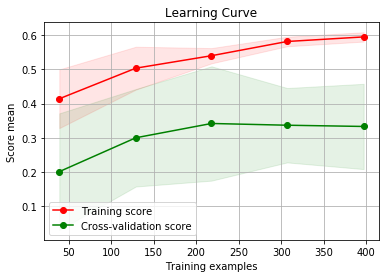

In [90]:
plot.learning_curve(train_score, test_score, train_size)

- x축은 데이터의 개수이다. 데이터가 많아질 수록 성능이 높아지는 양상을 보인다.(우상향 그래프)
- 빨강선보다 초록선이 더 중요하다. 
    - 빨강: 모델이 학습한 데이터로 평가
    - 초록: 모델이 안 본 데이터로 평가
- 그래프에서 넓게 칠해져 있는 부분은 오차범위 (편차)이다.

참고로 `learning_curve`와 비슷한 curve가 하나 더 있다. grid search 할 때 배울 예정이다. 
```python
plot.validation_curve()
```

classification 데이터로 learning curve를 그려보자.

In [94]:
from sklearn.datasets import load_breast_cancer

In [95]:
data = load_breast_cancer()

In [102]:
data_pd = pd.DataFrame(data.data, columns=data.feature_names)
data_ta = pd.DataFrame(data.target, columns=["target"])
cancer = pd.concat([data_pd, data_ta], axis=1)

In [103]:
cancer.info() # 데이터에 비해서 column이 너무 많다. 
              # 차원의 저주에 걸릴 수 있다.
              # feature selection으로 column을 줄이는게 좋다. (도메인 지식으로 유용한 feature 선별 가능)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
train_size, train_score, test_score = learning_curve(KNeighborsClassifier(), cancer[cancer.columns[:-1]], cancer.target, cv=10)

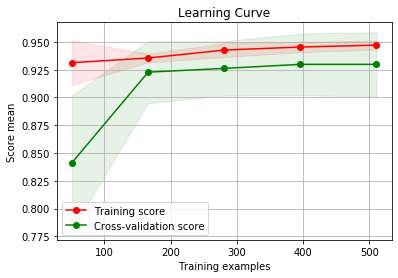

In [108]:
plot.learning_curve(train_score, test_score, train_size)

만약 초록선의 오차범위가 빨간선의 오차범위처럼 좁았더라면 이상적이었을 것이다.